# Version 0: Univariate Regression

To get our feet wet, we're going to make a very basic univariate regression model that predicts sale price from square footage.

In [1]:
# Standard Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
train = pd.read_csv('data/train.csv')

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The feature we're interested in is `GrLivArea`, which is above-grade square footage (and which is the sum of `1stFlrSF` + `2ndFlrSF` + `LowQualFinSF`).

In [2]:
train['GrLivArea'].isna().sum()

0

No missing values for this feature, so let's run a regression model.

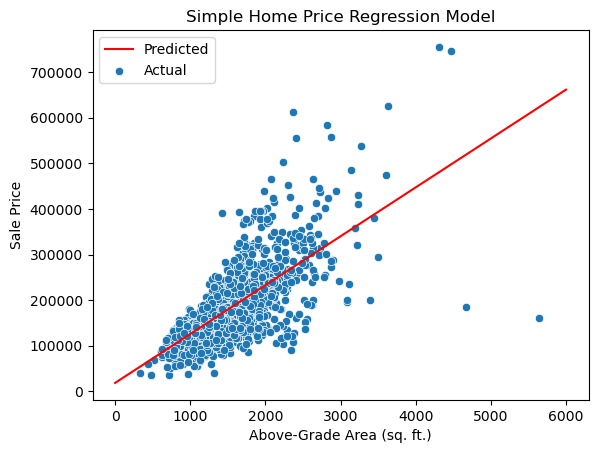

In [3]:
from sklearn.linear_model import LinearRegression

# Create feature and target variable
X = train[['GrLivArea']]
y = train['SalePrice']

# Create model
model = LinearRegression()

# Train model and predict
model.fit(X, y)

# Plot data and model
x_model = np.linspace(0, 6000)
m = model.coef_
b = model.intercept_
y_model = m * x_model + b

sns.scatterplot(x=X.iloc[:, 0], y=y, label="Actual")
sns.lineplot(x=x_model, y=y_model, color='red', label="Predicted")
plt.xlabel('Above-Grade Area (sq. ft.)')
plt.ylabel('Sale Price')
plt.title('Simple Home Price Regression Model')
plt.legend(loc='upper left');

And for a simpler version let's try Seaborn's built in regression plot.

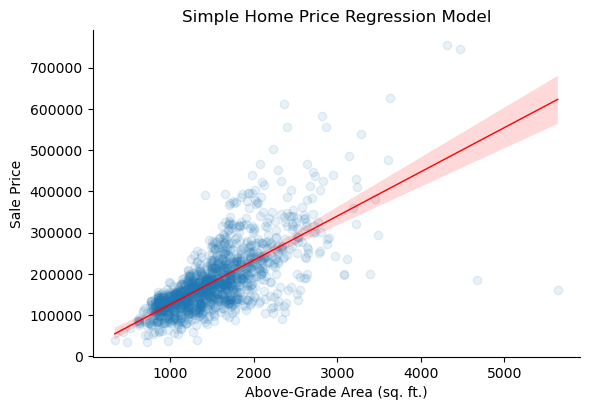

In [4]:
sns.lmplot(x='GrLivArea', y='SalePrice', data=train,
           scatter_kws={'alpha':0.1}, line_kws={'color':'red', 'lw':1}, 
           height=4, aspect=1.5)
plt.xlabel('Above-Grade Area (sq. ft.)')
plt.ylabel('Sale Price')
plt.title('Simple Home Price Regression Model');

Out of curiosity, let's see how well this very simple model performs. We'll evaluate it using the Root Mean Squared Error metric.

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_squared_log_error, make_scorer
from sklearn.model_selection import ShuffleSplit

# Make cross-validation generator
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=1)

# Make Root Mean Squared Error scorer
rmse = make_scorer(mean_squared_error, greater_is_better=False, squared=False)

# Report scores
scores = cross_val_score(model, X, y, scoring=rmse, cv=cv)
print("Mean RMSE score: ${:,.2f} (${:,.2f})".format(abs(scores.mean()), scores.std()))

Mean RMSE score: $57,429.75 ($3,420.98)


A limited model, as we can see: On average, predicted home prices are off by \\$57,429.75, which is +/- 35\% of the median home price of $163,000.

Because the Kaggle leaderboard uses the Root Mean Squared Log Error metric, let's evaluate once more using that to get a sense of how competitive this simple model might be:

In [6]:
rmsle = make_scorer(mean_squared_log_error, greater_is_better=False, squared=False)

scores = cross_val_score(model, X, y, scoring=rmsle, cv=cv)
print("Mean RMSLE score: {:,.5f} ({:,.5f})".format(abs(scores.mean()), scores.std()))

Mean RMSLE score: 0.28394 (0.00940)
